In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

#Matplotlib Config
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

<Figure size 1600x2688 with 0 Axes>

In [2]:
df = pd.read_csv('Employee.csv')

In [3]:
df.shape

(4653, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


**EDA**

In [5]:
df.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

**No missing values**

In [6]:
duplicates = df.duplicated().sum()
df = df.drop_duplicates()

print('No. of duplicate records :',duplicates)
print('Shape after dropping duplicate records :',df.shape)

No. of duplicate records : 1889
Shape after dropping duplicate records : (2764, 9)


In [7]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2764.000000,2764.000000,2764.000000,2764.000000,2764.000000
mean,2015.090449,2.636035,30.952967,2.644356,0.393632
std,1.885943,0.624001,5.108872,1.610610,0.488643
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,27.000000,1.000000,0.000000
50%,2015.000000,3.000000,30.000000,2.000000,0.000000
75%,2017.000000,3.000000,35.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


C:\ProgramData\Anaconda3\envs\epam\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:>

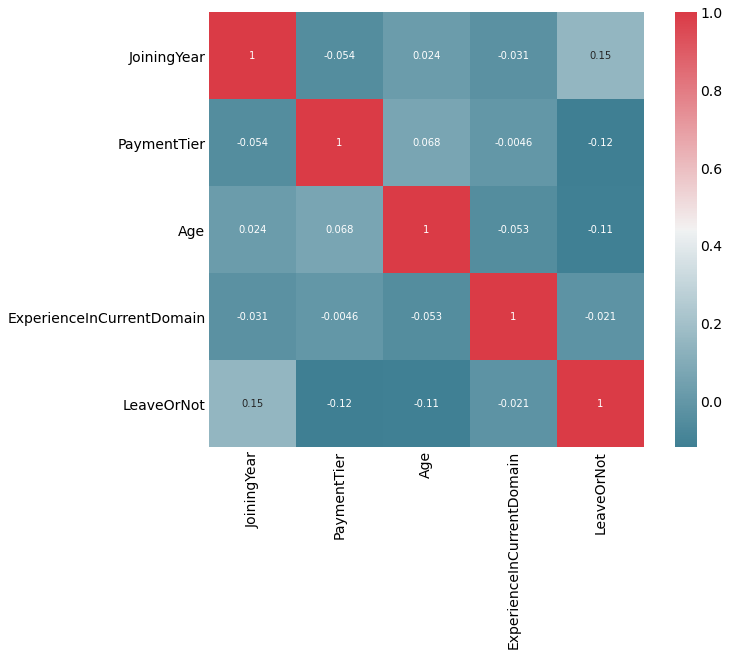

In [8]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax ,annot=True)

<AxesSubplot:xlabel='JoiningYear', ylabel='count'>

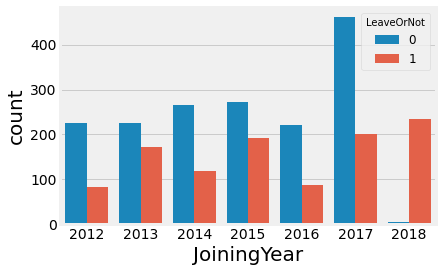

In [9]:
df['JoiningYear'] = df['JoiningYear'].astype('object')
sns.countplot(data = df ,x='JoiningYear',hue='LeaveOrNot')

<AxesSubplot:xlabel='EverBenched', ylabel='count'>

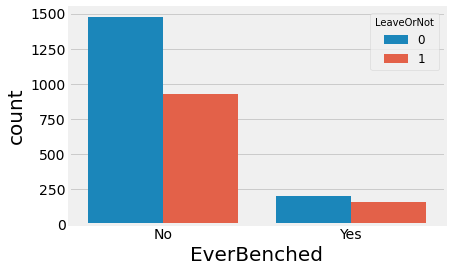

In [10]:
sns.countplot(data = df ,x='EverBenched',hue='LeaveOrNot')

<AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='count'>

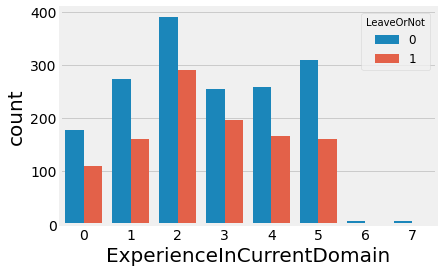

In [11]:
sns.countplot(data = df ,x='ExperienceInCurrentDomain',hue='LeaveOrNot')

<AxesSubplot:xlabel='Gender', ylabel='count'>

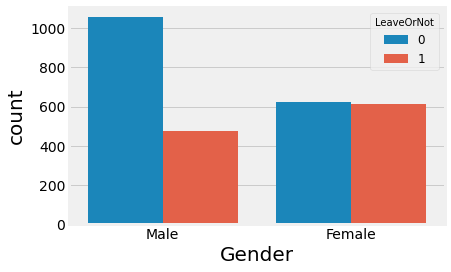

In [12]:
sns.countplot(data = df ,x='Gender',hue='LeaveOrNot')

<AxesSubplot:xlabel='PaymentTier', ylabel='count'>

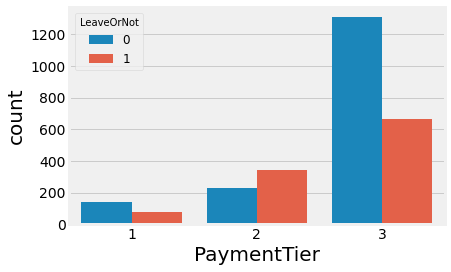

In [13]:
df['PaymentTier'] = df['PaymentTier'].astype('category')
sns.countplot(data = df ,x='PaymentTier',hue='LeaveOrNot')

<AxesSubplot:xlabel='City', ylabel='count'>

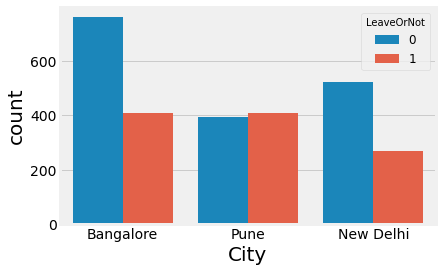

In [14]:
sns.countplot(data = df ,x='City',hue='LeaveOrNot')

<AxesSubplot:xlabel='Education', ylabel='count'>

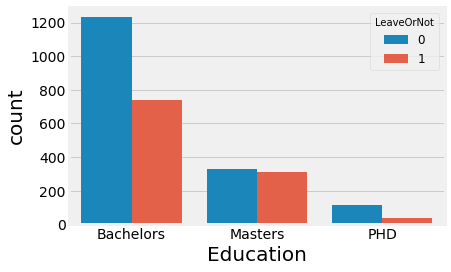

In [15]:
sns.countplot(data = df ,x='Education',hue='LeaveOrNot')

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

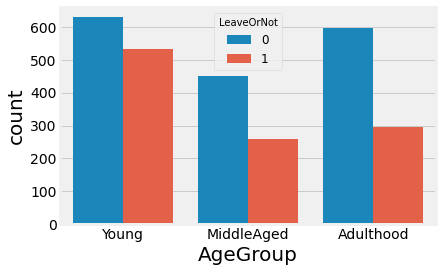

In [16]:
groups = ['Young', 'MiddleAged', 'Adulthood']
df['AgeGroup'] = pd.qcut(df['Age'], q=3, labels=groups)
sns.countplot(data = df ,x='AgeGroup',hue='LeaveOrNot')

**Feature Engineering**

In [17]:
X = df.drop('LeaveOrNot',axis=1)
y= df.LeaveOrNot.values


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [18]:
#new feature engineering code which got  me lgbm's acc : 83% and precision 97%

multi_categories = ['AgeGroup','EverBenched','City','JoiningYear']
ordinal_cat = [['PHD','Masters','Bachelors'],[1,2,3]]
binary_categories=['Gender','EverBenched']
transformer = ColumnTransformer(transformers=[('ohe1', OneHotEncoder(sparse='False'), multi_categories),
                                             ('oe',OrdinalEncoder(categories=ordinal_cat),['Education','PaymentTier']),
                                             ('ohe2', OneHotEncoder(drop='first',sparse='False'), binary_categories)],remainder='passthrough')

X_train = transformer.fit_transform(X_train)
X_train.shape
X_test = transformer.transform(X_test)

**Developing Models**

In [19]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=7,random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=17, random_state=2,max_depth=5)
abc = AdaBoostClassifier(n_estimators=17, random_state=2,learning_rate=0.2)
bc = BaggingClassifier(n_estimators=17, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=18,random_state=2)
xgb = XGBClassifier(n_estimators=17,random_state=2,use_label_encoder=False,eval_metric='mlogloss')
lgbm= LGBMClassifier(verbose=-1,
                          learning_rate=0.1,
                          max_depth=6,
                          num_leaves=10, 
                          n_estimators=17,
                          max_bin=500,random_state=2)


clfs = {
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb,
    'lgbm':lgbm
}


## Lets create a class for fitting , pred , accuracy , precision
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,zero_division=0)
    
    return accuracy,precision

accuracy_scores = []
precision_scores = []

## Obtaining the scores of accuracy and precision
for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)  
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

    
    
## Creating a dataframe to measure the accuracy and precision of all the models
## Sorted with the best one on the top (Desc order)
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
10,lgbm,0.830018,0.970370
2,DT,0.835443,0.933333
5,AdaBoost,0.757685,0.899083
9,xgb,0.830018,0.889571
8,GBDT,0.759494,0.879310
4,RF,0.781193,0.867647
3,LR,0.761302,0.790850
1,NB,0.723327,0.750000
6,BgC,0.741410,0.689320
0,KN,0.694394,0.651163
